# 1. Problem Statement

An image processing company is trying to build a model for classifying the pets (dogs and cats). As the artificial intelligence evolving day by day we asked for build a deep learning model for classifying the given image whether cat or dog

# 2. Dataset details and understanding and observations 

# It contains 25000 images and data is already divided into Train and test folders for dogs and cats respectively.

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 501kB 31.8MB/s 
     |████████████████████████████████| 4.3MB 27.3MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, ZeroPadding2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [8]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 36.15 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [9]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [10]:
img_width = 32
img_height = 32
batch_size = 20

3. Data pre-processing steps (Graphs or images if any) 
 Data is divided in 2 classes Dog and cats, so its binary classificaton problem

In [11]:
datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, target_size= (img_width, img_height), 
                                              classes =['dogs','cats'],
                                              class_mode = 'binary',
                                              batch_size = batch_size)

Found 20000 images belonging to 2 classes.


In [13]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir, target_size= (img_width, img_height), 
                                              classes =['dogs','cats'],
                                              class_mode = 'binary',
                                              batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [15]:
len(train_generator)

1000

# 4. CNN-NN Model explanation 

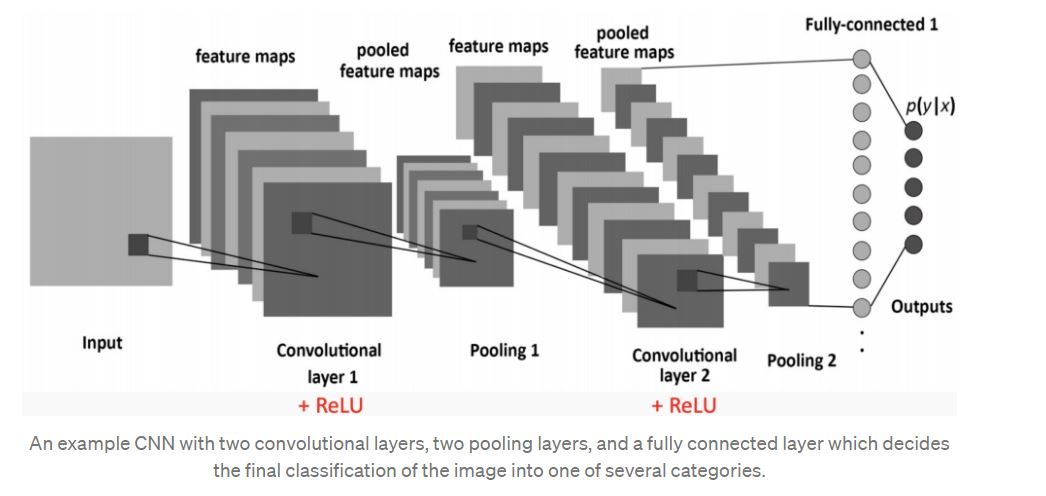

A Convolutional Neural Network, also known as CNN or ConvNet, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. ... Each neuron works in its own receptive field and is connected to other neurons in a way that they cover the entire visual field.

In [41]:
## 5. Build CNN Base Model

In [17]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same',kernel_initializer='he_uniform', input_shape = (img_width, img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(units=128, activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics= ['accuracy'])

In [20]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5,validation_data=validation_generator, validation_steps=len(validation_generator),verbose = 1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.6429 - accuracy: 0.6281 - val_loss: 0.6124 - val_accuracy: 0.6704
Epoch 2/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.5734 - accuracy: 0.6971 - val_loss: 0.5737 - val_accuracy: 0.7000
Epoch 3/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.5273 - accuracy: 0.7357 - val_loss: 0.6231 - val_accuracy: 0.6872
Epoch 4/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.4700 - accuracy: 0.7728 - val_loss: 0.5691 - val_accuracy: 0.7186
Epoch 5/5
1000/1000 [==============================] - 99s 99ms/step - loss: 0.4146 - accuracy: 0.8058 - val_loss: 0.6031 - val_accuracy: 0.7206


In [21]:
history.history

{'accuracy': [0.6280999779701233,
  0.6971499919891357,
  0.7356500029563904,
  0.7727500200271606,
  0.8058000206947327],
 'loss': [0.6429438591003418,
  0.5733612775802612,
  0.5273309350013733,
  0.4699785113334656,
  0.41456568241119385],
 'val_accuracy': [0.6704000234603882,
  0.699999988079071,
  0.6872000098228455,
  0.7185999751091003,
  0.7206000089645386],
 'val_loss': [0.6124438047409058,
  0.5737055540084839,
  0.6231380105018616,
  0.5691472887992859,
  0.6031315326690674]}

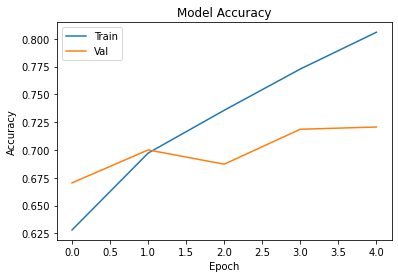

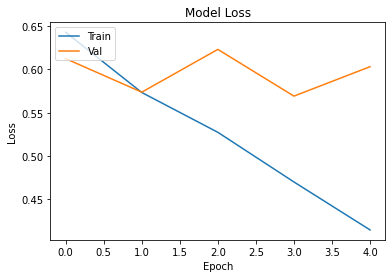

In [22]:
#Plot training and validationa accuracy values 
epoch_range= range(1,5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#Plot training and validationa loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#6. Observations-1 

4th epoch validation accuracy more than training accuracy so model is underfitting.
5th epoch both accuracy are almost same so model is neither Over or under fitting, its on the same scale.

#7. Transfer learning Procedure
 8. Building a model by using Transfer learning 
 Adding one more layer increasing fiters from 64 to 128 and one more layer of 256

## Implement first 3 blocks of VGG16 Model
## 

In [23]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),activation= 'relu',padding='same',kernel_initializer='he_uniform', input_shape = (img_width, img_height,3)))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3),activation= 'relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3),activation= 'relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(units=128, activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


In [24]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics= ['accuracy'])

In [27]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5,validation_data=validation_generator, validation_steps=len(validation_generator),verbose = 1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 183s 182ms/step - loss: 0.6935 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 183s 183ms/step - loss: 0.6936 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 182s 182ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 182s 182ms/step - loss: 0.6935 - accuracy: 0.5014 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 183s 183ms/step - loss: 0.6936 - accuracy: 0.4980 - val_loss: 0.6938 - val_accuracy: 0.5000


In [29]:
history.history

{'accuracy': [0.4966999888420105,
  0.5005000233650208,
  0.49834999442100525,
  0.5013999938964844,
  0.49799999594688416],
 'loss': [0.6934904456138611,
  0.6935687065124512,
  0.6934337019920349,
  0.6934609413146973,
  0.6935656070709229],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5],
 'val_loss': [0.6932189464569092,
  0.6931503415107727,
  0.6939226388931274,
  0.6940692067146301,
  0.693760335445404]}

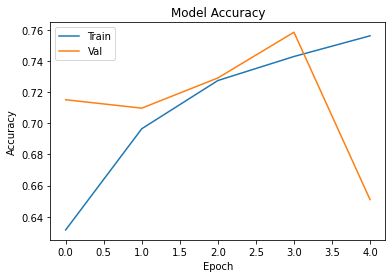

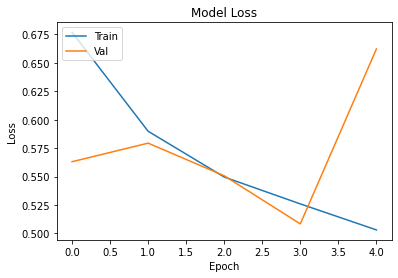

In [34]:
#Plot training and validationa accuracy values 
epoch_range= range(1,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#Plot training and validationa loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#9. Observations-2 


 Training accuracy is 50% so inshort our model is doing random guess so increasing layer for this not worked. To solve this issue we need to use Batch Normalization and dropout

## Add batch normalisation and drop out to improve accuracy

In [31]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),activation= 'relu',padding='same',kernel_initializer='he_uniform', input_shape = (img_width, img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3),activation= 'relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3),activation= 'relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation= 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))



In [32]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics= ['accuracy'])

In [33]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5,validation_data=validation_generator, validation_steps=len(validation_generator),verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 257s 257ms/step - loss: 0.6769 - accuracy: 0.6315 - val_loss: 0.5630 - val_accuracy: 0.7152
Epoch 2/5
1000/1000 [==============================] - 256s 256ms/step - loss: 0.5898 - accuracy: 0.6966 - val_loss: 0.5794 - val_accuracy: 0.7098
Epoch 3/5
1000/1000 [==============================] - 256s 256ms/step - loss: 0.5496 - accuracy: 0.7276 - val_loss: 0.5507 - val_accuracy: 0.7292
Epoch 4/5
1000/1000 [==============================] - 255s 255ms/step - loss: 0.5259 - accuracy: 0.7430 - val_loss: 0.5083 - val_accuracy: 0.7586
Epoch 5/5
1000/1000 [==============================] - 255s 255ms/step - loss: 0.5030 - accuracy: 0.7563 - val_loss: 0.6622 - val_accuracy: 0.6510


In [35]:
history.history

{'accuracy': [0.6315000057220459,
  0.6965500116348267,
  0.7275500297546387,
  0.7429999709129333,
  0.7562999725341797],
 'loss': [0.6769101023674011,
  0.5898135900497437,
  0.5495633482933044,
  0.5259138941764832,
  0.5030327439308167],
 'val_accuracy': [0.7152000069618225,
  0.7098000049591064,
  0.729200005531311,
  0.7585999965667725,
  0.6510000228881836],
 'val_loss': [0.5630254149436951,
  0.5793638825416565,
  0.5506582260131836,
  0.5083380341529846,
  0.6622235774993896]}

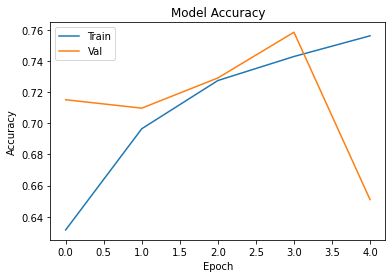

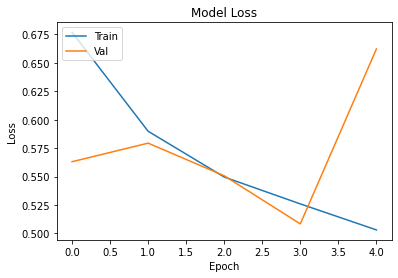

In [36]:
#Plot training and validationa accuracy values 
epoch_range= range(1,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#Plot training and validationa loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

Epoch 4 has almost same training and validation accuracy we should stop here